## Problem3

The following dataset consists of 1030 instances with 9 attributes and has no missing values. There are 8 input variables and 1 output variable. Seven input variables represent the amount of raw material (measured in kg/m³) and one represents Age (in Days). The target variable is Concrete Compressive Strength measured in (Mega Pascal). Build a Neural network model to predict the compressive strength.

In [1]:
# Import necessary libraries for MLP and reshaping the data structres
import numpy as np
# from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
# from keras.layers import Dropout,Flatten
from keras.utils import np_utils

np.random.seed(10)


In [2]:
import pandas as pd
data = pd.read_csv("concrete.csv")

In [3]:
data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [4]:
data.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [5]:
data.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [7]:
data[data.duplicated()]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
278,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
298,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
400,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
420,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
463,362.6,189.0,0.0,164.9,11.6,944.7,755.8,56,77.30
468,252.0,0.0,0.0,185.0,0.0,1111.0,784.0,28,19.69
482,425.0,106.3,0.0,153.5,16.5,852.1,887.1,91,65.20
493,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91,79.30
517,425.0,106.3,0.0,153.5,16.5,852.1,887.1,56,64.30
525,362.6,189.0,0.0,164.9,11.6,944.7,755.8,28,71.30


In [8]:
data.drop_duplicates(inplace = True,keep='first')

In [9]:
data[data.duplicated()]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength


In [10]:
data.var()

cement          10887.724744
slag             7425.407978
ash              4122.663231
water             455.367179
superplastic       35.046006
coarseagg        6018.604691
fineagg          6454.585440
age              4062.110923
strength          265.195212
dtype: float64

In [12]:
data.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.303324,-0.385610,-0.056625,0.060906,-0.086205,-0.245375,0.086348,0.488283
slag,-0.303324,1.000000,-0.312352,0.130262,0.019800,-0.277559,-0.289685,-0.042759,0.103374
ash,-0.385610,-0.312352,1.000000,-0.283314,0.414213,-0.026468,0.090262,-0.158940,-0.080648
water,-0.056625,0.130262,-0.283314,1.000000,-0.646946,-0.212480,-0.444915,0.279284,-0.269624
superplastic,0.060906,0.019800,0.414213,-0.646946,1.000000,-0.241721,0.207993,-0.194076,0.344209
coarseagg,-0.086205,-0.277559,-0.026468,-0.212480,-0.241721,1.000000,-0.162187,-0.005264,-0.144717
fineagg,-0.245375,-0.289685,0.090262,-0.444915,0.207993,-0.162187,1.000000,-0.156572,-0.186448
age,0.086348,-0.042759,-0.158940,0.279284,-0.194076,-0.005264,-0.156572,1.000000,0.337367
strength,0.488283,0.103374,-0.080648,-0.269624,0.344209,-0.144717,-0.186448,0.337367,1.000000


In [11]:
data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [13]:
data.iloc[:,:-1]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28
...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270


In [14]:
data.iloc[:,-1]

0       29.89
1       23.51
2       29.22
3       45.85
4       18.29
        ...  
1025    13.29
1026    41.30
1027    44.28
1028    55.06
1029    52.61
Name: strength, Length: 1005, dtype: float64

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# transform data
X = scaler.fit_transform(data.iloc[:,:-1])

In [16]:
print(X[:5, :])

[[0.08972603 0.58987201 0.         0.65255591 0.         0.49651163
  0.38760662 0.07417582]
 [0.15273973 0.11741792 0.62118941 0.29153355 0.33540373 0.81337209
  0.50727546 0.03571429]
 [0.33789954 0.         0.47826087 0.52396166 0.17080745 0.45319767
  0.67034621 0.07417582]
 [0.37442922 0.31719533 0.         0.84824281 0.         0.38081395
  0.19066734 0.07417582]
 [0.12054795 0.51029494 0.         0.57108626 0.2826087  0.71627907
  0.25765178 0.07417582]]


In [17]:
y=data.iloc[:,-1]

In [22]:
# Separating the data set into 2 parts - all the inputs and label columns
from sklearn.model_selection import train_test_split
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# summarize first 5 rows
print(X_train[:5, :])

[[0.25456621 0.         0.87056472 0.26198083 0.36335404 0.73052326
  0.4553437  0.00549451]
 [0.33789954 0.         0.47826087 0.55910543 0.16459627 0.42994186
  0.66031109 0.07417582]
 [0.25228311 0.         0.50174913 0.29952077 0.27018634 0.60116279
  0.77671851 0.27197802]
 [0.51141553 0.         0.68965517 0.61661342 0.34161491 0.
  0.49673859 0.07417582]
 [0.56392694 0.         0.         0.56070288 0.         0.74127907
  0.53938786 0.07417582]]


In [23]:
y_train.shape


(804,)

In [24]:
X_test.shape


(201, 8)

In [25]:
y_test.shape

(201,)

In [26]:
hidden_units1 = 200
hidden_units2 = 480
hidden_units3 = 156
learning_rate = 0.01
# Creating model using the Sequential in tensorflow
def design_mlp():
    model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(1, kernel_initializer='normal', activation='linear')
    ])
    return model

In [27]:
# building a cnn model using train data set and validating on test data set
model = design_mlp()

# fitting model on train data
#model.fit(x=X_train,y=y_train,batch_size=5,epochs=500,verbose = 1)


In [28]:
from tensorflow.keras.losses import MeanSquaredLogarithmicError
#from tensorflow.keras.optimizers import Adam
from keras.optimizers import adam_v2
#from keras.optimizers import adam
# loss function
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle, 
    optimizer=adam_v2.Adam(learning_rate=learning_rate), 
    metrics=[msle]
)

In [29]:
# train the model
history = model.fit(
    X_train, 
    y_train, 
    epochs=100, 
    batch_size=60
)

Epoch 1/100
14/14 [==============================] - 31s 5ms/step - loss: 4.9393 - mean_squared_logarithmic_error: 4.9268
Epoch 2/100
14/14 [==============================] - 0s 5ms/step - loss: 0.4736 - mean_squared_logarithmic_error: 0.4723
Epoch 3/100
14/14 [==============================] - 0s 5ms/step - loss: 0.2729 - mean_squared_logarithmic_error: 0.2731
Epoch 4/100
14/14 [==============================] - 0s 5ms/step - loss: 0.2068 - mean_squared_logarithmic_error: 0.2063
Epoch 5/100
14/14 [==============================] - 0s 5ms/step - loss: 0.1598 - mean_squared_logarithmic_error: 0.1597
Epoch 6/100
14/14 [==============================] - 0s 5ms/step - loss: 0.1395 - mean_squared_logarithmic_error: 0.1395
Epoch 7/100
14/14 [==============================] - 0s 5ms/step - loss: 0.1212 - mean_squared_logarithmic_error: 0.1209
Epoch 8/100
14/14 [==============================] - 0s 5ms/step - loss: 0.1195 - mean_squared_logarithmic_error: 0.1194
Epoch 9/100
14/14 [============

14/14 [==============================] - 0s 5ms/step - loss: 0.0428 - mean_squared_logarithmic_error: 0.0428
Epoch 69/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0472 - mean_squared_logarithmic_error: 0.0471
Epoch 70/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0447 - mean_squared_logarithmic_error: 0.0446
Epoch 71/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0439 - mean_squared_logarithmic_error: 0.0439
Epoch 72/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0464 - mean_squared_logarithmic_error: 0.0464
Epoch 73/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0453 - mean_squared_logarithmic_error: 0.0452
Epoch 74/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0457 - mean_squared_logarithmic_error: 0.0456
Epoch 75/100
14/14 [==============================] - 0s 6ms/step - loss: 0.0489 - mean_squared_logarithmic_error: 0.0489
Epoch 76/100
14/14 [=================

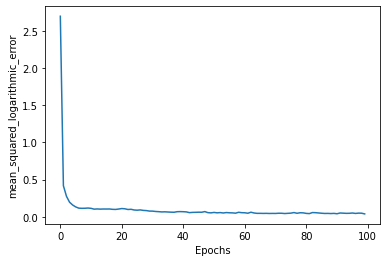

In [30]:
import matplotlib.pyplot as plt
def plot_history(history, key):
    plt.plot(history.history[key])
    #plt.plot(history.history['val_'+key])
    plt.xlabel("Epochs")
    plt.ylabel(key)
    #plt.legend([key, 'val_'+key])
    plt.show()
# Plot the history
plot_history(history, 'mean_squared_logarithmic_error')

In [31]:
y_pred = model.predict(X_test)

In [32]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8310462608274942